---

## Universidad de Costa Rica
### Escuela de Ingeniería Eléctrica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

---

* Estudiante: **Daniel Meza Sanabria**
* Carné: **B74786**



# `L4` - *Procesos Aleatorios*



---

Un proceso estocástico está definido por:

<h3 align="center">$X(t) = C \cos(\Omega t + \Theta)$</h3> 

donde 𝐶 es una variable aleatoria gaussiana de media 5 y varianza 0.2, $\Omega$ es una variable aleatoria distribuida uniformemente en el intervalo [2$\pi$(59,1) 2$\pi$(60,1)], y $\Theta$ es una variable aleatoria distribuida uniformemente en el intervalo [0, $\pi$/2 ]. Las tres variables aleatorias son estadísticamente independientes entre sí.

(a) Suponga que $\Omega$ no es una variable aleatoria, sino una constante $\omega$. Encuentre 𝐸[𝑋(𝑡)] a partir de:

<h3 align="center">$X(t) = C \cos(\omega t + \Theta)$</h3> 

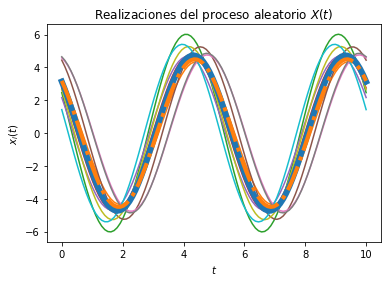

In [1]:
# Solución del Laboratorio 4 parte (a)

# Los parámetros T, t_final y N son elegidos arbitrariamente

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Variables aleatorias A y Z
vaC = stats.norm(5, np.sqrt(0.2))
vaW = stats.uniform((59.1)*2*np.pi, 1)
vaO = stats.uniform(0, np.pi/2)

# Creación del vector de tiempo
T = 100			# número de elementos
t_final = 10	# tiempo en segundos
t = np.linspace(0, t_final, T)

# Inicialización del proceso aleatorio X(t) con N realizaciones
N = 10
X_t = np.empty((N, len(t)))	# N funciones del tiempo x(t) con T puntos

# Creación de las muestras del proceso x(t) (C, W y W independientes)
for i in range(N):
	C = vaC.rvs()
	w = 2*59.6*np.pi # Constante omega
	O = vaO.rvs()
	x_t = C * np.cos(w*t + O)
	X_t[i,:] = x_t
	plt.plot(t, x_t)

# Promedio de las N realizaciones en cada instante (cada punto en t)
P = [np.mean(X_t[:,i]) for i in range(len(t))]
plt.plot(t, P, lw=6)

# Graficar el resultado teórico del valor esperado
E = 10/np.pi * (np.cos(w*t) - np.sin(w*t))
plt.plot(t, E, '-.', lw=4)

# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $X(t)$')
plt.xlabel('$t$')
plt.ylabel('$x_i(t)$')
plt.show()


(b) Suponga ahora que $\Omega$ y $\Theta$ son constantes, no variables aleatorias, de modo que:

<h3 align="center">$X(t) = C \cos(\omega t + \theta)$</h3>

Encuentre $R_{XX}(𝑡,𝑡 + \tau)$.

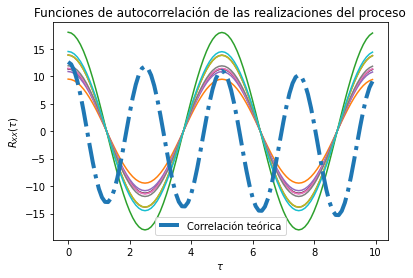

In [2]:
# Solución del Laboratorio 4 parte (b)

# T valores de desplazamiento tau
desplazamiento = np.arange(T)
taus = desplazamiento/t_final

# Inicialización de matriz de valores de correlación para las N funciones
corr = np.empty((N, len(desplazamiento)))

# Nueva figura para la autocorrelación
plt.figure()

# Cálculo de correlación para cada valor de tau
for n in range(N):
	for i, tau in enumerate(desplazamiento):
		corr[n, i] = np.correlate(X_t[n,:], np.roll(X_t[n,:], tau))/T
	plt.plot(taus, corr[n,:])

# Valor teórico de correlación
o = np.pi/4 # Constante theta
Rxx = 25.2 * np.cos(w*t + o) * np.cos(w*(t+taus) + o)

# Gráficas de correlación para cada realización y la
plt.plot(taus, Rxx, '-.', lw=4, label='Correlación teórica')
plt.title('Funciones de autocorrelación de las realizaciones del proceso')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{XX}(\tau)$')
plt.legend()
plt.show()


---

### Universidad de Costa Rica
#### Facultad de Ingeniería
##### Escuela de Ingeniería Eléctrica

---